<a href="https://colab.research.google.com/github/lakshmilux/Data-Science-course-with-R/blob/master/Audiologywitseperatetest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dft = pd.read_csv("/content/audiology_test.csv")
#dft.info()

In [3]:
dft.describe(include = "object")

,age_gt_60,air,airBoneGap,ar_c,ar_u,bone,boneAbnormal,bser,history_buzzing,history_dizziness,history_fluctuating,history_fullness,history_heredity,history_nausea,history_noise,history_recruitment,history_ringing,history_roaring,history_vomiting,late_wave_poor,m_at_2k,m_cond_lt_1k,m_gt_1k,m_m_gt_2k,m_m_sn,m_m_sn_gt_1k,m_m_sn_gt_2k,m_m_sn_gt_500,m_p_sn_gt_2k,m_s_gt_500,m_s_sn,m_s_sn_gt_1k,m_s_sn_gt_2k,m_s_sn_gt_3k,m_s_sn_gt_4k,m_sn_2_3k,m_sn_gt_1k,m_sn_gt_2k,m_sn_gt_3k,m_sn_gt_4k,m_sn_gt_500,m_sn_gt_6k,m_sn_lt_1k,m_sn_lt_2k,m_sn_lt_3k,middle_wave_poor,mod_gt_4k,mod_mixed,mod_s_mixed,mod_s_sn_gt_500,mod_sn,mod_sn_gt_1k,mod_sn_gt_2k,mod_sn_gt_3k,mod_sn_gt_4k,mod_sn_gt_500,notch_4k,notch_at_4k,o_ar_c(),o_ar_u(),s_sn_gt_1k,s_sn_gt_2k,s_sn_gt_4k,speech,static_normal,tymp,viith_nerve_signs,wave_V_delayed,waveform_ItoV_prolonged,identifier,class
count,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
unique,2,3,2,3,3,4,1,1,1,1,1,1,1,1,2,1,2,2,1,1,1,2,1,1,2,1,2,1,2,1,1,2,1,1,1,1,2,2,1,2,1,2,1,1,1,1,1,2,2,1,2,2,1,2,1,1,1,2,3,3,1,2,1,5,1,2,1,1,1,26,6
top,t,mild,f,normal,normal,unmeasured,f,?,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,normal,normal,f,f,f,good,t,a,f,f,f,t3,cochlear_age
freq,16,12,23,14,17,16,26,26,26,26,26,26,26,26,16,26,20,24,26,26,26,25,26,26,24,26,23,26,24,26,26,25,26,26,26,26,25,21,26,24,26,25,26,26,26,26,26,25,25,26,24,25,26,25,26,26,26,22,14,17,26,25,26,10,26,20,26,26,26,1,11


In [4]:
dft.columns = dft.columns.str.strip()
dft.columns

Index(['age_gt_60', 'air', 'airBoneGap', 'ar_c', 'ar_u', 'bone',
       'boneAbnormal', 'bser', 'history_buzzing', 'history_dizziness',
       'history_fluctuating', 'history_fullness', 'history_heredity',
       'history_nausea', 'history_noise', 'history_recruitment',
       'history_ringing', 'history_roaring', 'history_vomiting',
       'late_wave_poor', 'm_at_2k', 'm_cond_lt_1k', 'm_gt_1k', 'm_m_gt_2k',
       'm_m_sn', 'm_m_sn_gt_1k', 'm_m_sn_gt_2k', 'm_m_sn_gt_500',
       'm_p_sn_gt_2k', 'm_s_gt_500', 'm_s_sn', 'm_s_sn_gt_1k', 'm_s_sn_gt_2k',
       'm_s_sn_gt_3k', 'm_s_sn_gt_4k', 'm_sn_2_3k', 'm_sn_gt_1k', 'm_sn_gt_2k',
       'm_sn_gt_3k', 'm_sn_gt_4k', 'm_sn_gt_500', 'm_sn_gt_6k', 'm_sn_lt_1k',
       'm_sn_lt_2k', 'm_sn_lt_3k', 'middle_wave_poor', 'mod_gt_4k',
       'mod_mixed', 'mod_s_mixed', 'mod_s_sn_gt_500', 'mod_sn', 'mod_sn_gt_1k',
       'mod_sn_gt_2k', 'mod_sn_gt_3k', 'mod_sn_gt_4k', 'mod_sn_gt_500',
       'notch_4k', 'notch_at_4k', 'o_ar_c()', 'o_ar_u()', 's_sn_g

In [5]:
dft.drop(['bser','identifier'],axis = 1,inplace = True)

In [6]:
dft.shape

(26, 69)

In [7]:
dft.isna().sum()

age_gt_60                  0
air                        0
airBoneGap                 0
ar_c                       0
ar_u                       0
                          ..
tymp                       0
viith_nerve_signs          0
wave_V_delayed             0
waveform_ItoV_prolonged    0
class                      0
Length: 69, dtype: int64

In [8]:
dft['tymp'].describe()

count     26
unique     2
top        a
freq      20
Name: tymp, dtype: object

In [9]:
dft['static_normal'].value_counts()

t    26
Name: static_normal, dtype: int64

In [10]:
dft['tymp'] = dft['tymp'].map({'a':1,'as':'0'}).astype(int)
dft['static_normal'] = dft['static_normal'].map({'t':'0'}).astype(int)

In [11]:
dft1 = dft.drop(['tymp','static_normal'],axis = 1)
print(dft1.shape)

(26, 67)


In [12]:
for column in dft1.columns:
    if len(dft1[column].unique())==2:
        dft1[column] = dft1[column].map({'f' : 0, 't' : 1})

In [13]:
dft1.shape

(26, 67)

In [14]:
dft1.describe()
dft1.shape

(26, 67)

In [15]:
for column in dft1.columns:
    if  len(dft1[column].unique())==1:
        dft1[column] = dft1[column].map({'f' : 0})

In [16]:
dft1.describe()

,age_gt_60,airBoneGap,boneAbnormal,history_buzzing,history_dizziness,history_fluctuating,history_fullness,history_heredity,history_nausea,history_noise,history_recruitment,history_ringing,history_roaring,history_vomiting,late_wave_poor,m_at_2k,m_cond_lt_1k,m_gt_1k,m_m_gt_2k,m_m_sn,m_m_sn_gt_1k,m_m_sn_gt_2k,m_m_sn_gt_500,m_p_sn_gt_2k,m_s_gt_500,m_s_sn,m_s_sn_gt_1k,m_s_sn_gt_2k,m_s_sn_gt_3k,m_s_sn_gt_4k,m_sn_2_3k,m_sn_gt_1k,m_sn_gt_2k,m_sn_gt_3k,m_sn_gt_4k,m_sn_gt_500,m_sn_gt_6k,m_sn_lt_1k,m_sn_lt_2k,m_sn_lt_3k,middle_wave_poor,mod_gt_4k,mod_mixed,mod_s_mixed,mod_s_sn_gt_500,mod_sn,mod_sn_gt_1k,mod_sn_gt_2k,mod_sn_gt_3k,mod_sn_gt_4k,mod_sn_gt_500,notch_4k,notch_at_4k,s_sn_gt_1k,s_sn_gt_2k,s_sn_gt_4k,viith_nerve_signs,wave_V_delayed,waveform_ItoV_prolonged
count,26.000000,26.000000,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.000000,26.0,26.000000,26.000000,26.0,26.0,26.0,26.000000,26.0,26.0,26.000000,26.0,26.000000,26.0,26.000000,26.0,26.0,26.000000,26.0,26.0,26.0,26.0,26.000000,26.000000,26.0,26.000000,26.0,26.000000,26.0,26.0,26.0,26.0,26.0,26.000000,26.000000,26.0,26.000000,26.000000,26.0,26.000000,26.0,26.0,26.0,26.000000,26.0,26.000000,26.0,26.0,26.0,26.0
mean,0.615385,0.115385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384615,0.0,0.230769,0.076923,0.0,0.0,0.0,0.038462,0.0,0.0,0.076923,0.0,0.115385,0.0,0.076923,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.038462,0.192308,0.0,0.076923,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.038462,0.038462,0.0,0.076923,0.038462,0.0,0.038462,0.0,0.0,0.0,0.153846,0.0,0.038462,0.0,0.0,0.0,0.0
std,0.496139,0.325813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496139,0.0,0.429669,0.271746,0.0,0.0,0.0,0.196116,0.0,0.0,0.271746,0.0,0.325813,0.0,0.271746,0.0,0.0,0.196116,0.0,0.0,0.0,0.0,0.196116,0.401918,0.0,0.271746,0.0,0.196116,0.0,0.0,0.0,0.0,0.0,0.196116,0.196116,0.0,0.271746,0.196116,0.0,0.196116,0.0,0.0,0.0,0.367946,0.0,0.196116,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
50%,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
75%,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
max,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0


In [17]:
dft1.apply(pd.value_counts).T.stack()

age_gt_60  0                              10.0
           1                              16.0
air        mild                           12.0
           moderate                        4.0
           normal                         10.0
                                          ... 
class      cochlear_age_and_noise          4.0
           cochlear_poss_noise             4.0
           mixed_cochlear_age_fixation     1.0
           mixed_cochlear_unk_fixation     4.0
           normal_ear                      2.0
Length: 110, dtype: float64

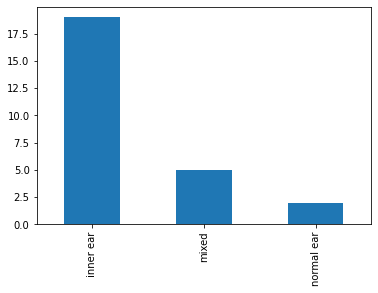

In [18]:

m = {'inner ear':['cochlear_age',
          'cochlear_age_and_noise','cochlear_age_plus_poss_menieres','cochlear_noise_and_heredity','cochlear_poss_noise',
          'cochlear_unknown','retrocochlear_unknown','acoustic_neuroma','poss_central','possible_brainstem_disorder'],
      'normal ear':['normal_ear','possible_menieres'],
      'mixed':['mixed_cochlear_age_fixation','mixed_cochlear_age_otitis_media','mixed_cochlear_age_s_om',
            'mixed_cochlear_unk_discontinuity','mixed_cochlear_unk_fixation','mixed_cochlear_unk_ser_om','mixed_poss_central_om','mixed_poss_noise_om']}
      # 'middle ear':['conductive_discontinuity','conductive_fixation','otitis_media'],
      # 'outer ear':['bells_palsy']}
dft1['class'].unique()
m2 = {v: k for k,vv in m.items() for v in vv}
len(m2)
dft1['class'] = dft1['class'].map(m2).astype("object") 
dft1['class'].value_counts().plot(kind = 'bar')

In [19]:
objdf = dft1.select_dtypes(include = "object")
objdf.describe()

,air,ar_c,ar_u,bone,o_ar_c(),o_ar_u(),speech,class
count,26,26,26,26,26,26,26,26
unique,3,3,3,4,3,3,5,3
top,mild,normal,normal,unmeasured,normal,normal,good,inner ear
freq,12,14,17,16,14,17,10,19


In [20]:
dft1.shape

(26, 67)

         air    ar_c    ar_u        bone o_ar_c() o_ar_u() speech      class
count     26      26      26          26       26       26     26         26
unique     3       3       3           4        3        3      5          3
top     mild  normal  normal  unmeasured   normal   normal   good  inner ear
freq      12      14      17          16       14       17     10         19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


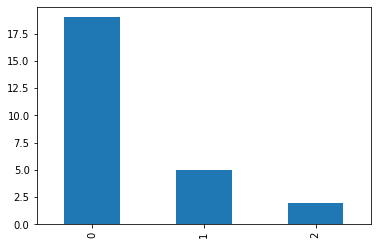

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfts2 = dft1.select_dtypes(include = 'object')
print(dfts2.describe())
for col in dfts2.columns:
   dfts2[col] = le.fit_transform(dfts2[col].astype(str))
dfts2.head()
dfts2['class'].value_counts().plot(kind = 'bar')


In [22]:
dft1.drop(objdf.columns,axis = 1,inplace = True)
dft1.shape


(26, 59)

In [23]:
dftest = pd.concat([dft1,dfts2],axis = 1)
dftest.shape

(26, 67)

In [24]:
dftest['tymp'] = dft['tymp']
dftest['static_normal'] = dft['static_normal']
dftest.shape

(26, 69)

In [25]:
dftest.describe()

,age_gt_60,airBoneGap,boneAbnormal,history_buzzing,history_dizziness,history_fluctuating,history_fullness,history_heredity,history_nausea,history_noise,history_recruitment,history_ringing,history_roaring,history_vomiting,late_wave_poor,m_at_2k,m_cond_lt_1k,m_gt_1k,m_m_gt_2k,m_m_sn,m_m_sn_gt_1k,m_m_sn_gt_2k,m_m_sn_gt_500,m_p_sn_gt_2k,m_s_gt_500,m_s_sn,m_s_sn_gt_1k,m_s_sn_gt_2k,m_s_sn_gt_3k,m_s_sn_gt_4k,m_sn_2_3k,m_sn_gt_1k,m_sn_gt_2k,m_sn_gt_3k,m_sn_gt_4k,m_sn_gt_500,m_sn_gt_6k,m_sn_lt_1k,m_sn_lt_2k,m_sn_lt_3k,middle_wave_poor,mod_gt_4k,mod_mixed,mod_s_mixed,mod_s_sn_gt_500,mod_sn,mod_sn_gt_1k,mod_sn_gt_2k,mod_sn_gt_3k,mod_sn_gt_4k,mod_sn_gt_500,notch_4k,notch_at_4k,s_sn_gt_1k,s_sn_gt_2k,s_sn_gt_4k,viith_nerve_signs,wave_V_delayed,waveform_ItoV_prolonged,air,ar_c,ar_u,bone,o_ar_c(),o_ar_u(),speech,class,tymp,static_normal
count,26.000000,26.000000,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.000000,26.0,26.000000,26.000000,26.0,26.0,26.0,26.000000,26.0,26.0,26.000000,26.0,26.000000,26.0,26.000000,26.0,26.0,26.000000,26.0,26.0,26.0,26.0,26.000000,26.000000,26.0,26.000000,26.0,26.000000,26.0,26.0,26.0,26.0,26.0,26.000000,26.000000,26.0,26.000000,26.000000,26.0,26.000000,26.0,26.0,26.0,26.000000,26.0,26.000000,26.0,26.0,26.0,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,0.615385,0.115385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384615,0.0,0.230769,0.076923,0.0,0.0,0.0,0.038462,0.0,0.0,0.076923,0.0,0.115385,0.0,0.076923,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.038462,0.192308,0.0,0.076923,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.038462,0.038462,0.0,0.076923,0.038462,0.0,0.038462,0.0,0.0,0.0,0.153846,0.0,0.038462,0.0,0.0,0.0,0.0,0.923077,1.269231,1.423077,2.192308,1.269231,1.423077,1.269231,0.346154,0.769231,0.0
std,0.496139,0.325813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496139,0.0,0.429669,0.271746,0.0,0.0,0.0,0.196116,0.0,0.0,0.271746,0.0,0.325813,0.0,0.271746,0.0,0.0,0.196116,0.0,0.0,0.0,0.0,0.196116,0.401918,0.0,0.271746,0.0,0.196116,0.0,0.0,0.0,0.0,0.0,0.196116,0.196116,0.0,0.271746,0.196116,0.0,0.196116,0.0,0.0,0.0,0.367946,0.0,0.196116,0.0,0.0,0.0,0.0,0.934797,0.874423,0.856648,1.200641,0.874423,0.856648,1.372813,0.628796,0.429669,0.0
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.250000,1.000000,2.000000,0.250000,1.000000,0.000000,0.000000,1.000000,0.0
50%,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.0
75%,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.750000,0.750000,1.000000,0.0
max,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,

In [26]:
dtrain = pd.read_csv("/content/audiology.csv")



In [27]:
dtrain.columns = dtrain.columns.str.strip()

In [28]:
import numpy as np
for column in dtrain.columns:
    count = dtrain[column][dtrain[column]=='?'].count()
    if count!=0:
        dtrain[column] = dtrain[column].replace("?", np.nan)
#print(df.iloc[:,1:30].isna().sum())

In [29]:
dtrain['bone'] = dtrain['bone'].fillna(dtrain['bone'].mode()[0])
dtrain['speech'] = dtrain['speech'].fillna(dtrain['speech'].mode()[0])
dtrain['ar_c'] = dtrain['ar_c'].fillna(dtrain['ar_c'].mode()[0])
dtrain['ar_u'] = dtrain['ar_u'].fillna(dtrain['ar_u'].mode()[0])
dtrain['o_ar_c()'] = dtrain['o_ar_c()'].fillna(dtrain['o_ar_c()'].mode()[0])
dtrain['o_ar_c()'] = dtrain['o_ar_c()'].fillna(dtrain['o_ar_c()'].mode()[0])

In [30]:
for column in dtrain.columns:
    if  len(dtrain[column].unique())==2:
        dtrain[column] = dtrain[column].map({'f' : 0, 't' : 1})

In [31]:
for column in dtrain.columns:
    if  len(dtrain[column].unique())==1:
        dtrain[column] = dtrain[column].map({'f' : 0})

In [32]:
m = {'inner ear':['cochlear_age',
          'cochlear_age_and_noise','cochlear_age_plus_poss_menieres','cochlear_noise_and_heredity','cochlear_poss_noise',
          'cochlear_unknown','retrocochlear_unknown','acoustic_neuroma','poss_central','possible_brainstem_disorder'],
      'normal ear':['normal_ear','possible_menieres'],
      'mixed':['mixed_cochlear_age_fixation','mixed_cochlear_age_otitis_media','mixed_cochlear_age_s_om',
            'mixed_cochlear_unk_discontinuity','mixed_cochlear_unk_fixation','mixed_cochlear_unk_ser_om','mixed_poss_central_om','mixed_poss_noise_om']}
      # 'middle ear':['conductive_discontinuity','conductive_fixation','otitis_media'],
      # 'outer ear':['bells_palsy']}
dtrain['class'].unique()
m2 = {v: k for k,vv in m.items() for v in vv}
len(m2)
dtrain['class'] = dtrain['class'].map(m2).astype("object") 
dtrain['class'].describe()


count           187
unique            3
top       inner ear
freq            139
Name: class, dtype: object

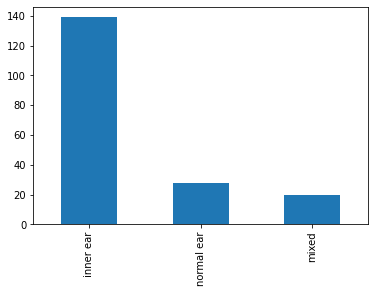

In [33]:
dtrain['class'].value_counts().plot(kind = 'bar')

In [34]:
dtrain.drop(['identifier','bser'],axis = 1,inplace = True)

In [35]:
dtrain.shape

(200, 69)

In [36]:
objdtr = dtrain.select_dtypes(include = 'object')

In [37]:
dtrain['class'] = dtrain['class'].fillna(dtrain['class'].mode()[0])
dtrain.select_dtypes(include = 'object').isna().sum()

air         0
ar_c        0
ar_u        0
bone        0
o_ar_c()    0
o_ar_u()    2
speech      0
tymp        0
class       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


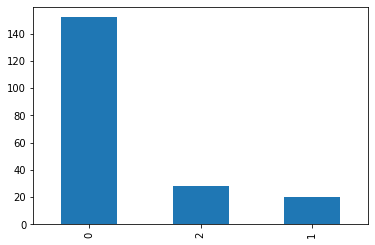

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dtr = dtrain.select_dtypes(include = 'object')
#dtrain['class'].value_counts().plot(kind = 'bar')
#print(df2.describe())
for col in dtr.columns:
   dtr[col] = le.fit_transform(dtr[col].astype(str))
dtr['class'].value_counts().plot(kind = 'bar')

In [39]:
dtr.describe()

,air,ar_c,ar_u,bone,o_ar_c(),o_ar_u(),speech,tymp,class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.990000,1.355000,1.415000,0.835000,1.410000,1.915000,1.830000,0.400000,0.380000
std,1.120795,0.855943,0.809972,1.189474,0.845859,1.302404,1.635381,1.012485,0.719855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,0.000000,0.000000
max,4.000000,2.000000,2.000000,3.000000,2.000000,3.000000,5.000000,4.000000,2.000000


In [40]:
objdtr.describe()

,air,ar_c,ar_u,bone,o_ar_c(),o_ar_u(),speech,tymp,class
count,200,200,200,200,200,198,200,200,187
unique,5,3,3,4,3,3,6,5,3
top,mild,normal,normal,mild,normal,normal,normal,a,inner ear
freq,101,121,124,130,129,114,89,169,139


In [41]:
dtrain.drop(objdtr.columns,axis = 1,inplace = True)

In [42]:
trdf = pd.concat([dtrain,dtr],axis = 1)
trdf.shape

(200, 69)

In [43]:
trdf.describe()

,age_gt_60,airBoneGap,boneAbnormal,history_buzzing,history_dizziness,history_fluctuating,history_fullness,history_heredity,history_nausea,history_noise,history_recruitment,history_ringing,history_roaring,history_vomiting,late_wave_poor,m_at_2k,m_cond_lt_1k,m_gt_1k,m_m_gt_2k,m_m_sn,m_m_sn_gt_1k,m_m_sn_gt_2k,m_m_sn_gt_500,m_p_sn_gt_2k,m_s_gt_500,m_s_sn,m_s_sn_gt_1k,m_s_sn_gt_2k,m_s_sn_gt_3k,m_s_sn_gt_4k,m_sn_2_3k,m_sn_gt_1k,m_sn_gt_2k,m_sn_gt_3k,m_sn_gt_4k,m_sn_gt_500,m_sn_gt_6k,m_sn_lt_1k,m_sn_lt_2k,m_sn_lt_3k,middle_wave_poor,mod_gt_4k,mod_mixed,mod_s_mixed,mod_s_sn_gt_500,mod_sn,mod_sn_gt_1k,mod_sn_gt_2k,mod_sn_gt_3k,mod_sn_gt_4k,mod_sn_gt_500,notch_4k,notch_at_4k,s_sn_gt_1k,s_sn_gt_2k,s_sn_gt_4k,static_normal,viith_nerve_signs,wave_V_delayed,waveform_ItoV_prolonged,air,ar_c,ar_u,bone,o_ar_c(),o_ar_u(),speech,tymp,class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.0,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.380000,0.115000,0.250000,0.005000,0.100000,0.035000,0.005000,0.010000,0.060000,0.260000,0.010000,0.020000,0.045000,0.030000,0.010000,0.005000,0.0,0.005000,0.010000,0.035000,0.025000,0.015000,0.005000,0.0,0.005000,0.005000,0.0,0.005000,0.005000,0.005000,0.005000,0.040000,0.080000,0.020000,0.045000,0.005000,0.0,0.015000,0.005000,0.005000,0.010000,0.005000,0.0,0.0,0.005000,0.0,0.005000,0.035000,0.045000,0.015000,0.015000,0.125000,0.055000,0.010000,0.030000,0.010000,0.940000,0.005000,0.010000,0.010000,0.990000,1.355000,1.415000,0.835000,1.410000,1.915000,1.830000,0.400000,0.380000
std,0.486604,0.319823,0.434099,0.070711,0.300753,0.184241,0.070711,0.099748,0.238083,0.439735,0.099748,0.140351,0.207824,0.171015,0.099748,0.070711,0.0,0.070711,0.099748,0.184241,0.156517,0.121857,0.070711,0.0,0.070711,0.070711,0.0,0.070711,0.070711,0.070711,0.070711,0.196451,0.271974,0.140351,0.207824,0.070711,0.0,0.121857,0.070711,0.070711,0.099748,0.070711,0.0,0.0,0.070711,0.0,0.070711,0.184241,0.207824,0.121857,0.121857,0.331549,0.228552,0.099748,0.171015,0.099748,0.238083,0.070711,0.099748,0.099748,1.120795,0.855943,0.809972,1.189474,0.845859,1.302404,1.635381,1.012485,0.719855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

(200, 69)

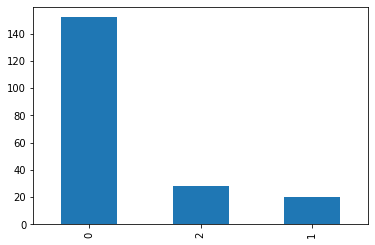

In [44]:
trdf['class'].value_counts().plot(kind = 'bar')
trdf.shape

(26, 69)

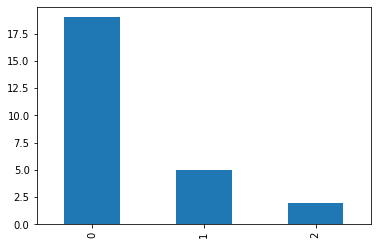

In [45]:
dftest['class'].value_counts().plot(kind = 'bar')
dftest.shape

In [46]:
from sklearn import preprocessing# Get column names first
names = trdf.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(trdf)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [47]:
Q1 = scaled_df.quantile(0.25)
Q3 = scaled_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age_gt_60            2.060214
airBoneGap           0.000000
boneAbnormal         0.577350
history_buzzing      0.000000
history_dizziness    0.000000
                       ...   
o_ar_c()             1.185197
o_ar_u()             1.539475
speech               1.839038
tymp                 0.000000
class                0.000000
Length: 69, dtype: float64


In [48]:
df_out = scaled_df[~((scaled_df < (Q1 - 1.5 * IQR)) |(scaled_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(14, 69)

In [49]:
trdf.drop(df_out.index,inplace = True)
print(trdf.shape)

(186, 69)


In [50]:
xtrain = trdf.iloc[:,:-1]
ytrain = trdf.iloc[:,-1]
xtrain.head()

,age_gt_60,airBoneGap,boneAbnormal,history_buzzing,history_dizziness,history_fluctuating,history_fullness,history_heredity,history_nausea,history_noise,history_recruitment,history_ringing,history_roaring,history_vomiting,late_wave_poor,m_at_2k,m_cond_lt_1k,m_gt_1k,m_m_gt_2k,m_m_sn,m_m_sn_gt_1k,m_m_sn_gt_2k,m_m_sn_gt_500,m_p_sn_gt_2k,m_s_gt_500,m_s_sn,m_s_sn_gt_1k,m_s_sn_gt_2k,m_s_sn_gt_3k,m_s_sn_gt_4k,m_sn_2_3k,m_sn_gt_1k,m_sn_gt_2k,m_sn_gt_3k,m_sn_gt_4k,m_sn_gt_500,m_sn_gt_6k,m_sn_lt_1k,m_sn_lt_2k,m_sn_lt_3k,middle_wave_poor,mod_gt_4k,mod_mixed,mod_s_mixed,mod_s_sn_gt_500,mod_sn,mod_sn_gt_1k,mod_sn_gt_2k,mod_sn_gt_3k,mod_sn_gt_4k,mod_sn_gt_500,notch_4k,notch_at_4k,s_sn_gt_1k,s_sn_gt_2k,s_sn_gt_4k,static_normal,viith_nerve_signs,wave_V_delayed,waveform_ItoV_prolonged,air,ar_c,ar_u,bone,o_ar_c(),o_ar_u(),speech,tymp
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,2,3,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,2,0,2,3,1,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,2,0,1,2
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,2,0,1,3
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0,2,3,0,0


In [51]:
xtest = dftest.drop('class',axis = 1)
print(xtest.columns)
ytest = dftest.loc[:,'class']
print(ytest)

Index(['age_gt_60', 'airBoneGap', 'boneAbnormal', 'history_buzzing',
       'history_dizziness', 'history_fluctuating', 'history_fullness',
       'history_heredity', 'history_nausea', 'history_noise',
       'history_recruitment', 'history_ringing', 'history_roaring',
       'history_vomiting', 'late_wave_poor', 'm_at_2k', 'm_cond_lt_1k',
       'm_gt_1k', 'm_m_gt_2k', 'm_m_sn', 'm_m_sn_gt_1k', 'm_m_sn_gt_2k',
       'm_m_sn_gt_500', 'm_p_sn_gt_2k', 'm_s_gt_500', 'm_s_sn', 'm_s_sn_gt_1k',
       'm_s_sn_gt_2k', 'm_s_sn_gt_3k', 'm_s_sn_gt_4k', 'm_sn_2_3k',
       'm_sn_gt_1k', 'm_sn_gt_2k', 'm_sn_gt_3k', 'm_sn_gt_4k', 'm_sn_gt_500',
       'm_sn_gt_6k', 'm_sn_lt_1k', 'm_sn_lt_2k', 'm_sn_lt_3k',
       'middle_wave_poor', 'mod_gt_4k', 'mod_mixed', 'mod_s_mixed',
       'mod_s_sn_gt_500', 'mod_sn', 'mod_sn_gt_1k', 'mod_sn_gt_2k',
       'mod_sn_gt_3k', 'mod_sn_gt_4k', 'mod_sn_gt_500', 'notch_4k',
       'notch_at_4k', 's_sn_gt_1k', 's_sn_gt_2k', 's_sn_gt_4k',
       'viith_nerve_signs', 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


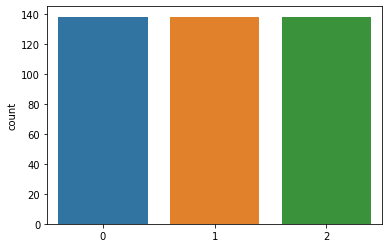

In [144]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
x = trdf.drop(['class'],axis=1)
y = trdf['class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(x,y)
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
sns.countplot(y_sampled)       
    

In [145]:
from sklearn.model_selection import train_test_split
atr,ats,btr,bts = train_test_split(x_sampled,y_sampled,test_size = 26,random_state = 42 )

In [146]:
print(atr.shape)
print(ats.shape)
print(btr.shape)
print(bts.shape)

(388, 68)
(26, 68)
(388,)
(26,)


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
# Create a random forest classifier
clftr = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1,class_weight="balanced")

# Train the classifier
clftr.fit(atr,btr)

# Print the name and gini importance of each feature
for feature in zip(atr.columns, clftr.feature_importances_):
    print(feature)

('age_gt_60', 0.030090842669823457)
('airBoneGap', 0.054249882537990825)
('boneAbnormal', 0.04657637866301364)
('history_buzzing', 0.0003730391489654694)
('history_dizziness', 0.014204667717647213)
('history_fluctuating', 0.03773026551536401)
('history_fullness', 0.0003541082192727501)
('history_heredity', 0.0013890588500648617)
('history_nausea', 0.009989575136766867)
('history_noise', 0.02737957249089848)
('history_recruitment', 0.0037600335057782915)
('history_ringing', 0.012609093264882796)
('history_roaring', 0.007725852121435037)
('history_vomiting', 0.005277091717899922)
('late_wave_poor', 0.004031309158788418)
('m_at_2k', 0.0009505063398878821)
('m_cond_lt_1k', 0.0)
('m_gt_1k', 0.0015066440041695682)
('m_m_gt_2k', 0.0018380405685893815)
('m_m_sn', 0.0019609945263936676)
('m_m_sn_gt_1k', 0.0020893656798162794)
('m_m_sn_gt_2k', 0.0017650106681829693)
('m_m_sn_gt_500', 0.0007712366590003752)
('m_p_sn_gt_2k', 0.0)
('m_s_gt_500', 9.396702401761878e-05)
('m_s_sn', 6.353389562766416e-

In [148]:
  # Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfmtr = SelectFromModel(clftr, threshold=0.01)
sfmtr
# Train the selector
sfmtr.fit(atr,btr)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight='balanced',
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=

In [149]:
feat_labels = atr.columns
#print(feat_labels)
for feature_list_index in sfmtr.get_support(indices=True):
    print(feat_labels[feature_list_index])

age_gt_60
airBoneGap
boneAbnormal
history_dizziness
history_fluctuating
history_noise
history_ringing
m_sn_gt_2k
m_sn_lt_1k
notch_4k
air
ar_c
ar_u
bone
o_ar_c()
o_ar_u()
speech
tymp


In [150]:
#m_newtr,m_newts,n_newtr,n_newts
#xtrain,xtest,ytrain,ytest
X_important_traintr = sfmtr.transform(atr)
X_important_testtr = sfm.transform(ats)
print(X_important_traintr.shape)
print(atr.shape)


(388, 18)
(388, 68)


In [151]:
# Create a new random forest classifier for the most important features
clf_importanttr = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1,class_weight="balanced")

# Train the new classifier on the new dataset containing the most important features
clf_importanttr.fit(X_important_traintr, btr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [152]:
# Apply The Full Featured Classifier To The Test Data
y_predtr = clftr.predict(ats)
print(y_predtr)
print(ytest)
# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(ytest, y_predtr)

[2 2 2 2 2 2 1 2 2 0 0 0 2 0 0 2 0 1 2 2 0 0 2 0 2 2]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    2
17    1
18    0
19    0
20    0
21    1
22    2
23    1
24    0
25    0
Name: class, dtype: int64


0.23076923076923078

In [153]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rstr = RandomizedSearchCV(clf_importanttr, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rstr.fit(X_important_traintr, btr)
rstr.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


{'bootstrap': False,
 'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 700}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,20,3),
     'max_features' : ['auto','log2'],
    'bootstrap' : ['True','False']
}

gstr = GridSearchCV(clf_important, grid_param, cv = 3, verbose = 1, n_jobs=-1)
gstr.fit(X_important_traintr, btr)
rfc2tr = gs.best_estimator_
gstr.best_params_

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  8.0min


In [ ]:
y_pred_rftr = clf.predict(xtest)
# Apply The important Featured Classifier To The Test Data
y_important_predtr = clf_importanttr.predict(X_important_testtr)
y_pred_gstr = gstr.best_estimator_.predict(X_important_testtr)

tstpredrftr = accuracy_score(ytest,y_pred_rftr)
tstpredpcatr = accuracy_score(ytest,y_important_predtr)
tstpredgstr = accuracy_score(ytest,y_pred_gstr)
print(tstpredrftr)
print(tstpredpcatr)
print(tstpredgstr)


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1,class_weight="balanced")

# Train the classifier
clf.fit(xtrain,ytrain)

# Print the name and gini importance of each feature
for feature in zip(xtrain.columns, clf.feature_importances_):
    print(feature)

('age_gt_60', 0.0316854074694803)
('airBoneGap', 0.05742201557335321)
('boneAbnormal', 0.046096086225121506)
('history_buzzing', 0.00032071084510182173)
('history_dizziness', 0.015572212370092245)
('history_fluctuating', 0.03521342054338195)
('history_fullness', 0.000299049877445293)
('history_heredity', 0.0010258022075695498)
('history_nausea', 0.009483457833276058)
('history_noise', 0.03094214896306105)
('history_recruitment', 0.003944068468997845)
('history_ringing', 0.010319525941494654)
('history_roaring', 0.007366662054659494)
('history_vomiting', 0.004626423648184971)
('late_wave_poor', 0.003061616311327065)
('m_at_2k', 0.0013451920215732714)
('m_cond_lt_1k', 0.0)
('m_gt_1k', 0.001959237306609978)
('m_m_gt_2k', 0.001590985794998078)
('m_m_sn', 0.0020112380903902836)
('m_m_sn_gt_1k', 0.0016955824607251745)
('m_m_sn_gt_2k', 0.001620727388813047)
('m_m_sn_gt_500', 0.0005969832397856049)
('m_p_sn_gt_2k', 0.0)
('m_s_gt_500', 0.00010909845196847768)
('m_s_sn', 5.735473586050631e-05)
(

In [73]:
  # Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.01)
sfm
# Train the selector
sfm.fit(xtrain,ytrain)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight='balanced',
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=

In [74]:
feat_labels = xtrain.columns
#print(feat_labels)
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age_gt_60
airBoneGap
boneAbnormal
history_dizziness
history_fluctuating
history_noise
history_ringing
m_sn_gt_2k
m_sn_gt_4k
m_sn_lt_1k
notch_4k
air
ar_c
ar_u
bone
o_ar_c()
o_ar_u()
speech
tymp


In [75]:
#m_newtr,m_newts,n_newtr,n_newts
#xtrain,xtest,ytrain,ytest
X_important_train = sfm.transform(xtrain)
X_important_test = sfm.transform(xtest)
print(X_important_train.shape)
print(xtrain.shape)


(186, 19)
(186, 68)


In [76]:
ytest.describe()

count    26.000000
mean      0.346154
std       0.628796
min       0.000000
25%       0.000000
50%       0.000000
75%       0.750000
max       2.000000
Name: class, dtype: float64

In [77]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1,class_weight="balanced")

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(xtest)
print(y_pred)
print(ytest)
# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(ytest, y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    2
17    1
18    0
19    0
20    0
21    1
22    2
23    1
24    0
25    0
Name: class, dtype: int64


0.7307692307692307

In [79]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)
print(y_important_pred)
print(y_pred)
# View The Accuracy Of Our Limited Feature (20 Features) Model
accuracy_score(ytest, y_important_pred)

[2 2 0 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.5

In [80]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(clf_important, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_important_train, ytrain)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


{'bootstrap': True,
 'max_depth': 14,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 700}

In [81]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,10,1),
     'max_features' : ['auto','log2'],
    'bootstrap' : ['True','False']
}

gs = GridSearchCV(clf_important, grid_param, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_important_train, ytrain)
rfc2 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 4096 candidates, totalling 12288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

{'bootstrap': 'True',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [83]:
y_pred_rf = clf.predict(xtest)
# Apply The important Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)
y_pred_gs = gs.best_estimator_.predict(X_important_test)

tstpredrf = accuracy_score(ytest,y_pred_rf)
tstpredpca = accuracy_score(ytest,y_important_pred)
tstpredgs = accuracy_score(ytest,y_pred_gs)
print(tstpredrf)
print(tstpredpca)
print(tstpredgs)


0.7307692307692307
0.5
0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


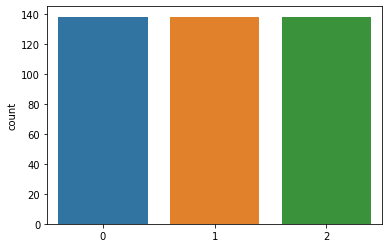

In [87]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
x = trdf.drop(['class'],axis=1)
y = trdf['class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(x,y)
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
sns.countplot(y_sampled)       
    

[0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 1 0 0
 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 2 0
 0 0 0 1 1 1 1 1 0 0 2 2 0 2 0 0 0 2 2 2 0 0 0 1 0 1 0 0 0 2 0 1 0 1 2 2 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


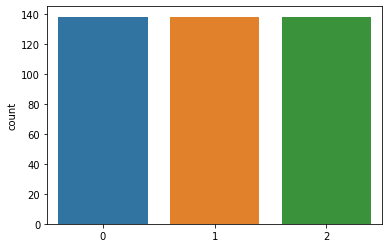

In [118]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
xtes = trdf.drop(['class'],axis=1)
ytes = trdf['class']
rdsmplets = RandomOverSampler()
x_tes,y_tes  = rdsmple.fit_sample(xtes,ytes)
x_tes = pd.DataFrame(data = x_tes, columns = xtes.columns)
sns.countplot(y_tes)   
print(y_tes)    
    

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
# Create a random forest classifier
clfbal = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1,class_weight="balanced")

# Train the classifier
clfbal.fit(x_sampled,y_sampled)

# Print the name and gini importance of each feature
for feature in zip(x_sampled.columns, clf.feature_importances_):
    print(feature)

('age_gt_60', 0.0316854074694803)
('airBoneGap', 0.05742201557335321)
('boneAbnormal', 0.046096086225121506)
('history_buzzing', 0.00032071084510182173)
('history_dizziness', 0.015572212370092245)
('history_fluctuating', 0.03521342054338195)
('history_fullness', 0.000299049877445293)
('history_heredity', 0.0010258022075695498)
('history_nausea', 0.009483457833276058)
('history_noise', 0.03094214896306105)
('history_recruitment', 0.003944068468997845)
('history_ringing', 0.010319525941494654)
('history_roaring', 0.007366662054659494)
('history_vomiting', 0.004626423648184971)
('late_wave_poor', 0.003061616311327065)
('m_at_2k', 0.0013451920215732714)
('m_cond_lt_1k', 0.0)
('m_gt_1k', 0.001959237306609978)
('m_m_gt_2k', 0.001590985794998078)
('m_m_sn', 0.0020112380903902836)
('m_m_sn_gt_1k', 0.0016955824607251745)
('m_m_sn_gt_2k', 0.001620727388813047)
('m_m_sn_gt_500', 0.0005969832397856049)
('m_p_sn_gt_2k', 0.0)
('m_s_gt_500', 0.00010909845196847768)
('m_s_sn', 5.735473586050631e-05)
(

In [120]:
  # Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfmbal = SelectFromModel(clfbal, threshold=0.01)
sfmbal
# Train the selector
sfmbal.fit(x_sampled,y_sampled)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight='balanced',
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=

In [121]:
feat_labels = x_sampled.columns
#print(feat_labels)
for feature_list_index in sfmbal.get_support(indices=True):
    print(feat_labels[feature_list_index])

age_gt_60
airBoneGap
boneAbnormal
history_dizziness
history_fluctuating
history_noise
m_sn_gt_2k
m_sn_lt_1k
notch_4k
air
ar_c
ar_u
bone
o_ar_c()
o_ar_u()
speech
tymp


In [122]:
X_important_trainbal = sfmbal.transform(x_sampled)
X_important_testbal = sfmbal.transform(x_tes)
print(X_important_train.shape)
print(x_sampled.shape)


(414, 17)
(414, 68)


In [123]:
# Create a new random forest classifier for the most important features
clf_importantbal = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_importantbal.fit(X_important_trainbal, y_sampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [124]:
# Apply The Full Featured Classifier To The Test Data
y_predbal = clfbal.predict(x_tes)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_tes, y_predbal)

1.0

In [125]:
# Apply The Full Featured Classifier To The Test Data
y_important_predbal = clf_importantbal.predict(X_important_testbal)

# View The Accuracy Of Our Limited Feature (20 Features) Model
accuracy_score(y_tes, y_important_predbal)

0.9975845410628019

In [126]:
from xgboost import XGBClassifier
model = XGBClassifier(objective = 'multi:softmax')
model.fit(x_sampled,y_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [127]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_sampled)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_sampled,predictions)
accuracy

0.9855072463768116

In [ ]:
y_pred = model.predict(xtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(ytest,predictions)
accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [ ]:
grid= GridSearchCV(XGBClassifier(objective='multi:softmax'),param_grid, verbose=3,njobs = -1)

In [ ]:
grid.fit(xsampled,ysampled)

In [ ]:
grid.best_params_


In [ ]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(xsampled, ysampled)

In [ ]:
y_pred_new = new_model.predict(xtest)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(ytest,predictions_new)
accuracy_new